## 29. Нелинейный метод наименьших квадратов

[Ratkowsky D. A. Nonlinear Regression Modeling. 1983]

Нелинейным методом наименьших квадратов
построить модели вида
$$
y = \frac{\beta_1}{1 + \beta_2 e^{-\beta_3 t}},
\qquad
\mbox{и}
\qquad
y = \frac{\beta_1}{(1 + \beta_2 e^{-\beta_3 t})^{1/\beta_4}},
$$
для данных, приведенных в таблице
```
    t         y    
  ----------------   
    1       16.08    
    2       33.83  
    3       65.80  
    4       97.20  
    5      191.55  
    6      326.20  
    7      386.87  
    8      520.53  
    9      590.03  
   10      651.92  
   11      724.93  
   12      699.56  
   13      689.96  
   14      637.56  
   15      717.41             
```
Предиктор $t$ – время, 
переменная отклика $y$ – вес сухой луковицы вместе с надземной частью растения.
Найти общую ошибку в каждом из этих случаев и сравнить результаты.

In [128]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [129]:
#Исходные данные
t = np.arange(1, 16, 1)
y = np.array([16.08,33.83,65.80,97.20,191.55,326.20,386.87,520.53,590.03,651.92,724.93,699.56,689.96,637.56,717.41])

Метод наименьших квадратов (МНК).  
Пусть имеются точки
$$
(x_1, y_1),\, (x_2, y_2),\, \dots,\, (x_m, y_m).
$$
Ищем линейную функцию  
$$
y = \beta_0 + \beta_1 x,
$$
такую, что
$$
y_i \approx \beta_0 + \beta_1 x_i
\qquad
(i=1,2,\dots, m).
$$
А именно, ищем $\beta_0$, $\beta_1$, на которых достигается минимум суммы квадратов невязок (*остаточной суммы квадратов*)
$$
R(\beta_0,\, \beta_1) = \sum_{i=1}^m \bigl(y_i - \beta_0 - \beta_1 x_i\bigr)^2 \to \min_{\beta_0,\, \beta_1} 
$$
$R(\beta_0,\, \beta_1)$ - это сумма квадратов отклонений предсказанных значений $\beta_0 + \beta_1 x_i$ от истинных $y_i$. 

Для построения модели с помощью метода наименьших квадратов используем функцию curve_fit, которая использует нелинейный метод наименьших квадратов для максимального совпадения построенной функции с исходными данными.

Построим модель вида $ y = \frac{\beta_1}{1 + \beta_2 e^{-\beta_3 t}} $, применив МНК.  

[β1 β2 β3] = [7.02871478e+02 8.49924183e+01 6.88565587e-01]


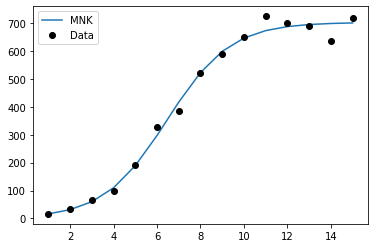

In [130]:
p0 = [700,85,0.7]
def fun1(t,b1,b2,b3):
    return b1 / (1 + b2*np.exp(-1*b3*t))
y1 = np.empty (15,  dtype=np.float)
b, _ = curve_fit(fun1, t, y, p0)
print("[β1 β2 β3] =", b)
for i in range(0, 15):
    y1[i] = fun1(t[i], b[0], b[1], b[2])
plt.plot(t, y1, label='MNK')
plt.plot(t, y, "ko",  label='Data')
plt.legend()
pass

Построим модель вида  $y = \frac{\beta_1}{(1 + \beta_2 e^{-\beta_3 t})^{1/\beta_4}}$ , применив МНК.

[β1 β2 β3] = [699.64135945 195.79500488   0.75962554   1.27922586]


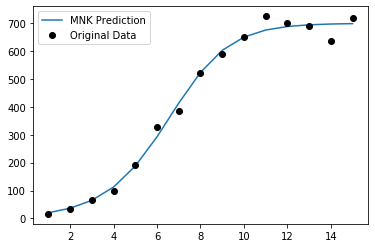

In [131]:
p0 = [700,200,0.7,1.3]
def fun2(t,b1,b2,b3,b4):
    return b1 / ((b2*np.exp(-1*b3*t) + 1)**(1/b4))
y2 = np.empty (15,  dtype=np.float)
b, _ = curve_fit(fun2, t, y, p0)
print("[β1 β2 β3] =", b)
for i in range(0, 15):
    #y2[i] = fun2(t[i], 700, 70, 0.01, 0.01)
    y2[i] = fun2(t[i], b[0], b[1], b[2], b[3])
plt.plot(t, y2,  label='MNK Prediction')
plt.plot(t, y, "ko",  label='Original Data')
plt.legend()
pass

Общую ошибку обеих моделей вычислим по данной формуле: $\frac{\sum_{i=1}^n (y_i - f_i(x))^2}{n} $

In [132]:
er1 = np.array (y - y1)
for i in range (0,15):
    er1[i] = er1[i]**2
error1 = sum(er1)/15
er2 = np.array (y - y2)
for i in range (0,15):
    er2[i] = er2[i]**2
error2 = sum(er2)/15
print("Ошибка модели 1 = ", error1)
print("Ошибка модели 2 = ", error2)

Ошибка модели 1 =  595.3255315004633
Ошибка модели 2 =  585.760327350927


Вывод:
Вторая модель оказалась немного точнее первой. Очевидно, что точность решения напрямую зависит от количества переменных, по которым составляется уравнение.